# Project Overview
The analysis will focus on exploring, understanding, and predicting the impact of social media usage on suicide rates over time. The project will be broken down into the following steps:

1. Exploratory Data Analysis (EDA): To identify trends, correlations, and distributions.

2. Inferential Analysis: Formulate and test hypotheses about the relationship between social media user counts and suicide rates.

3. Predictive Modeling: Build machine learning models to predict future suicide rates based on social media user data.

# Key Questions

1. EDA Key Questions:
- What are the trends in suicide rates over time?
- How have social media user counts changed over the years?
- What is the correlation between social media user counts and suicide rates?

2. Inferential Analysis Key Question:
- Is there a statistically significant relationship between the change in social media user count and suicide rates?

3. Prediction Key Questions:
- Which model best predicts the suicide rate based on social media data?
- How do different models compare in terms of performance metrics?

---

## Data Loading and Initial Processing

---

In [2]:
import sys, os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import f1_score, precision_recall_fscore_support
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
import xgboost as xgb

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression

import warnings
warnings.filterwarnings("ignore")

In [5]:
import pandas as pd

# Load the dataset
data = pd.read_csv("/Users/jeesoojhun/Documents/Flatiron/Assessments/Phase 3/Rapid EDA & MLR/Impact of social media on suicide rates/social-media-impact-on-suicide-rates.csv")

# Display the first few rows of the dataframe
data.head()

,year,sex,Suicide Rate % change since 2010,Twitter user count % change since 2010,Facebook user count % change since 2010
0,2010,BTSX,100.000000,100.000000,100.000000
1,2010,FMLE,100.000000,100.000000,100.000000
2,2010,MLE,100.000000,100.000000,100.000000
3,2011,BTSX,98.681894,216.666667,138.980263
4,2011,FMLE,98.183773,216.666667,138.980263


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   year                                     30 non-null     int64  
 1   sex                                      30 non-null     object 
 2   Suicide Rate % change since 2010         30 non-null     float64
 3   Twitter user count % change since 2010   30 non-null     float64
 4   Facebook user count % change since 2010  30 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.3+ KB


In [8]:
# Display basic information about the dataset
print("Data Information:")
print(data.info())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Check for duplicate rows
print("\nNumber of duplicate rows:", data.duplicated().sum())

# Display basic statistics of the dataset
print("\nData Description:")
print(data.describe())


Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   year                                     30 non-null     int64  
 1   sex                                      30 non-null     object 
 2   Suicide Rate % change since 2010         30 non-null     float64
 3   Twitter user count % change since 2010   30 non-null     float64
 4   Facebook user count % change since 2010  30 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.3+ KB
None

Missing Values:
year                                       0
sex                                        0
Suicide Rate % change since 2010           0
Twitter user count % change since 2010     0
Facebook user count % change since 2010    0
dtype: int64

Number of duplicate rows: 0

Data Description:
              year  

In [26]:
data.rename(columns={
    'Suicide Rate % change since 2010': 'Suicide Rate Change',
    'Twitter user count % change since 2010': 'Twitter User Count Change',
    'Facebook user count % change since 2010': 'Facebook User Count Change'
}, inplace=True)

# Display the updated dataframe to verify changes
data.head()

,year,sex,Suicide Rate Change,Twitter User Count Change,Facebook User Count Change
0,2010,BTSX,100.000000,100.000000,100.000000
1,2010,FMLE,100.000000,100.000000,100.000000
2,2010,MLE,100.000000,100.000000,100.000000
3,2011,BTSX,98.681894,216.666667,138.980263
4,2011,FMLE,98.183773,216.666667,138.980263


array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'Suicide Rate Change'}>],
       [<Axes: title={'center': 'Twitter User Count Change'}>,
        <Axes: title={'center': 'Facebook User Count Change'}>]],
      dtype=object)

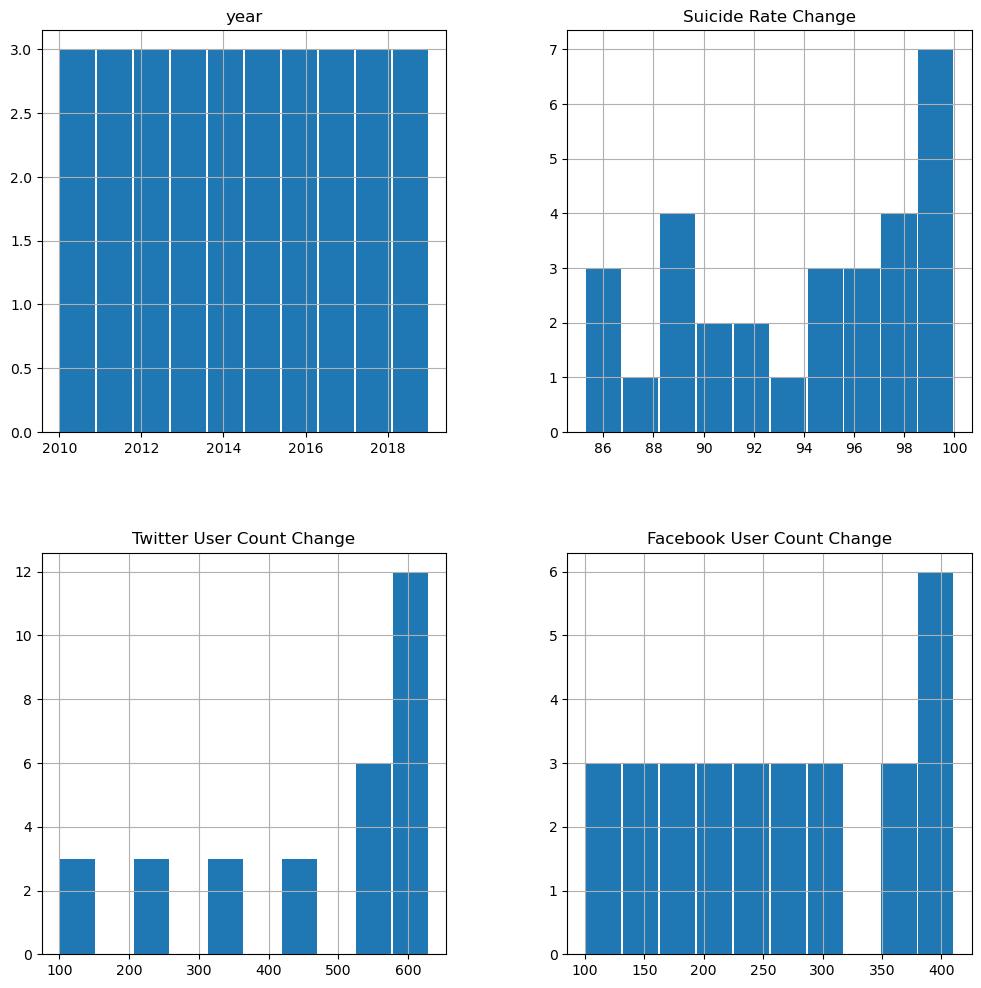

In [29]:
data.hist(rwidth=0.95, figsize=(12, 12))


1. Year:
The data is uniformly distributed across the years, showing consistent data collection over time.

2. Suicide Rate Change:
Most values are clustered around 98-100%, suggesting stable or slightly increasing suicide rates. Some lower values may indicate outliers or deviations.

3. Twitter User Count Change:
There is a strong skew toward higher values, with many data points around the 600% mark, indicating significant growth in Twitter usage since 2010.

4. Facebook User Count Change:
The distribution shows moderate growth, with most data points ranging between 100-400%. The increase is notable but less extreme than Twitter's.

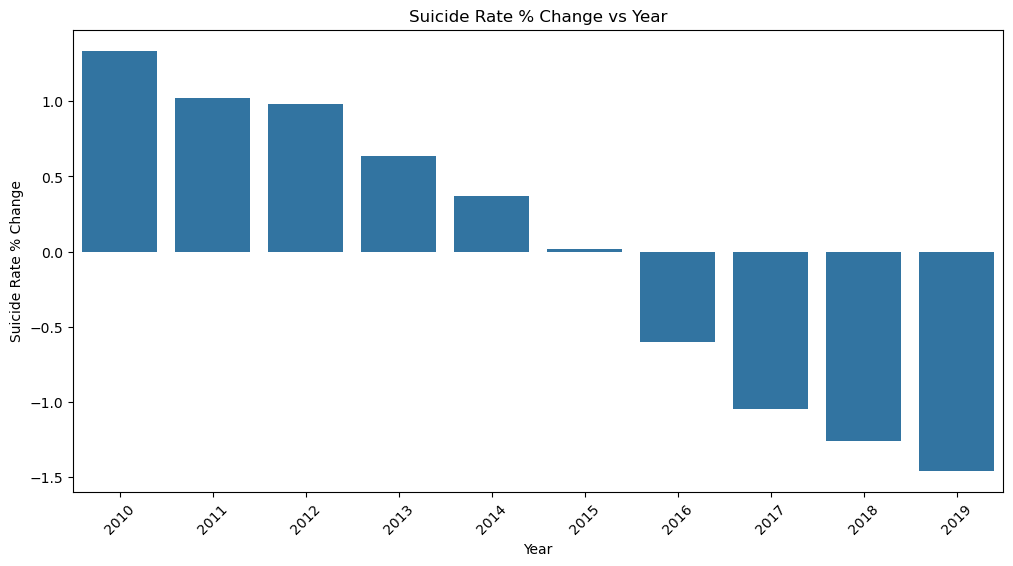

In [40]:
# Generate bar graph for suicide rate vs year
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='year', y='Suicide Rate Change', ci=None)
plt.title('Suicide Rate % Change vs Year')
plt.xlabel('Year')
plt.ylabel('Suicide Rate % Change')
plt.xticks(rotation=45)
plt.show()

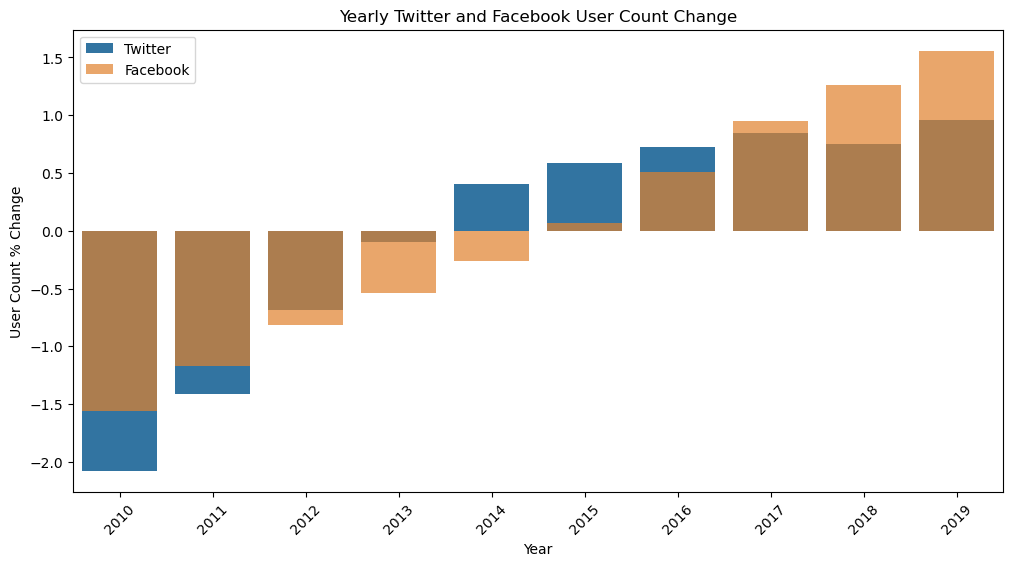

In [41]:
# generate bar graph with yearly twitter, facebook by year
plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='year', y='Twitter User Count Change', ci=None, label='Twitter')
sns.barplot(data=data, x='year', y='Facebook User Count Change', ci=None, label='Facebook', alpha=0.7)
plt.title('Yearly Twitter and Facebook User Count Change')
plt.xlabel('Year')
plt.ylabel('User Count % Change')
plt.legend()
plt.xticks(rotation=45)
plt.show()

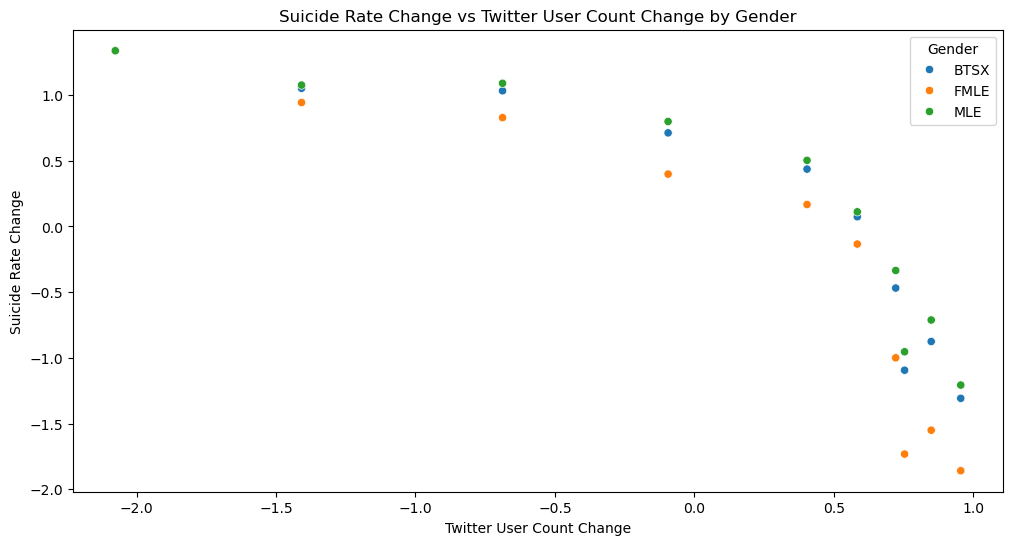

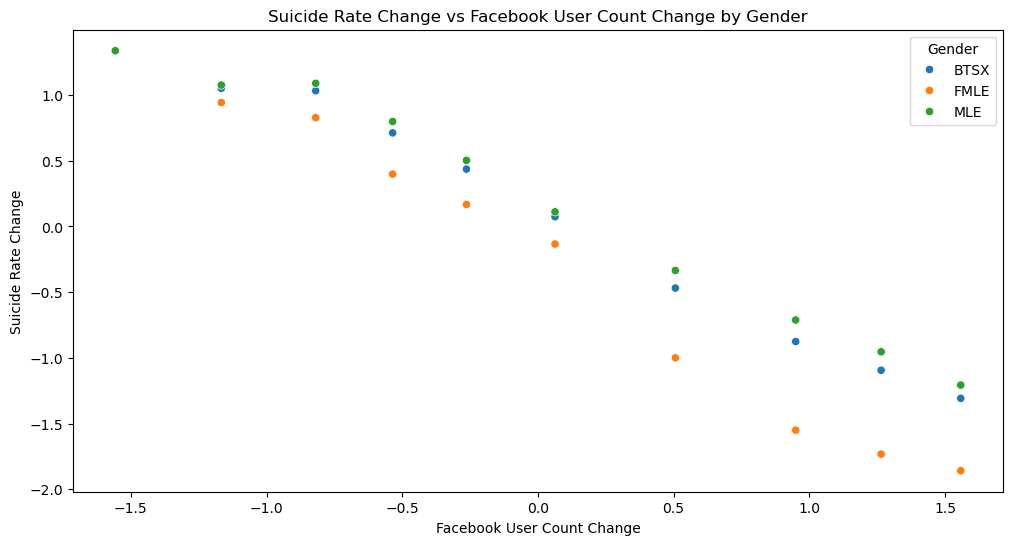

In [42]:
# Scatter plot for Suicide Rate Change vs Twitter User Count Change
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='Twitter User Count Change', y='Suicide Rate Change', hue='sex')
plt.title('Suicide Rate Change vs Twitter User Count Change by Gender')
plt.xlabel('Twitter User Count Change')
plt.ylabel('Suicide Rate Change')
plt.legend(title='Gender')
plt.show()

# Scatter plot for Suicide Rate Change vs Facebook User Count Change
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='Facebook User Count Change', y='Suicide Rate Change', hue='sex')
plt.title('Suicide Rate Change vs Facebook User Count Change by Gender')
plt.xlabel('Facebook User Count Change')
plt.ylabel('Suicide Rate Change')
plt.legend(title='Gender')
plt.show()

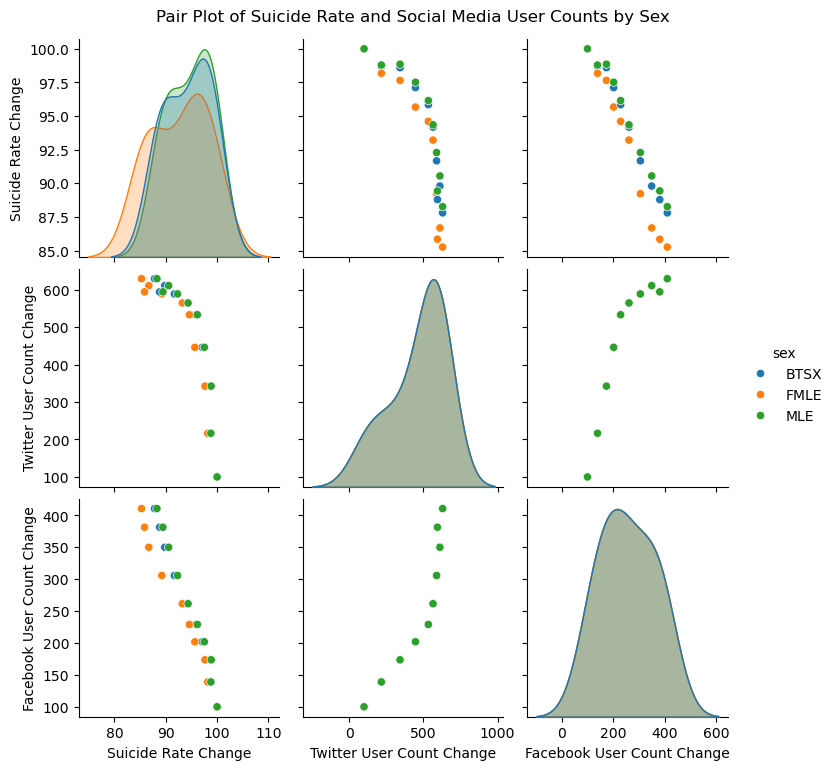

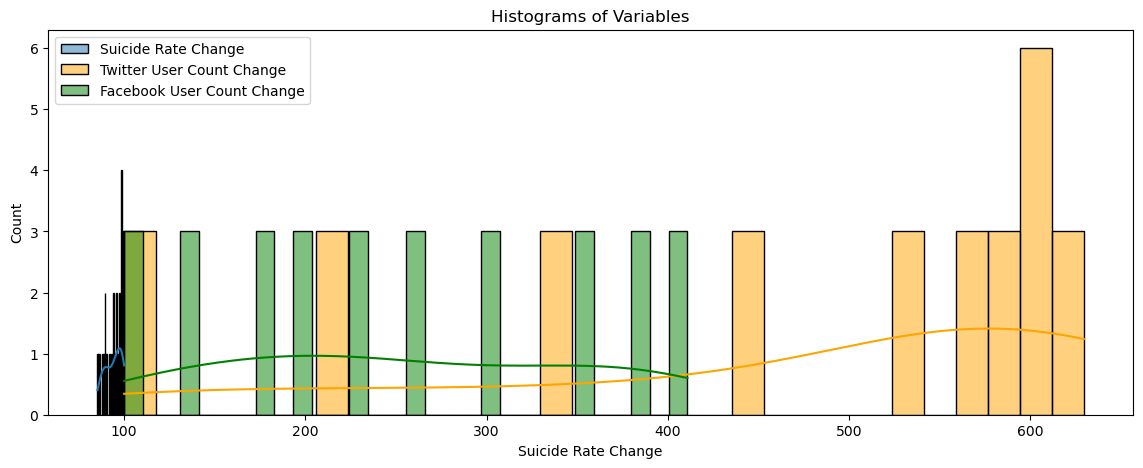

In [28]:

# Pair plot to see relationships between variables
sns.pairplot(data[['Suicide Rate Change', 'Twitter User Count Change',
                   'Facebook User Count Change', 'sex']], hue='sex')
plt.suptitle('Pair Plot of Suicide Rate and Social Media User Counts by Sex', y=1.02)
plt.show()

# Histograms for individual variable distribution
plt.figure(figsize=(14, 5))
sns.histplot(data['Suicide Rate Change'], kde=True, bins=30, label='Suicide Rate Change')
sns.histplot(data['Twitter User Count Change'], kde=True, bins=30, label='Twitter User Count Change', color='orange')
sns.histplot(data['Facebook User Count Change'], kde=True, bins=30, label='Facebook User Count Change', color='green')
plt.legend()
plt.title('Histograms of Variables')
plt.show()



1. Negative Correlation: The data suggests a potential inverse correlation between increases in social media user counts and changes in suicide rates, implying that higher social media growth might be associated with stable or slightly decreasing suicide rates.

2. Sex Differences: The pair plot indicates that sex may play a role in how suicide rate changes are distributed, suggesting the need for further stratified analysis by gender.

3. Outliers and Skewness: The histograms show skewness in Twitter User Count Change with potential outliers, which may need attention in further modeling to avoid biases.

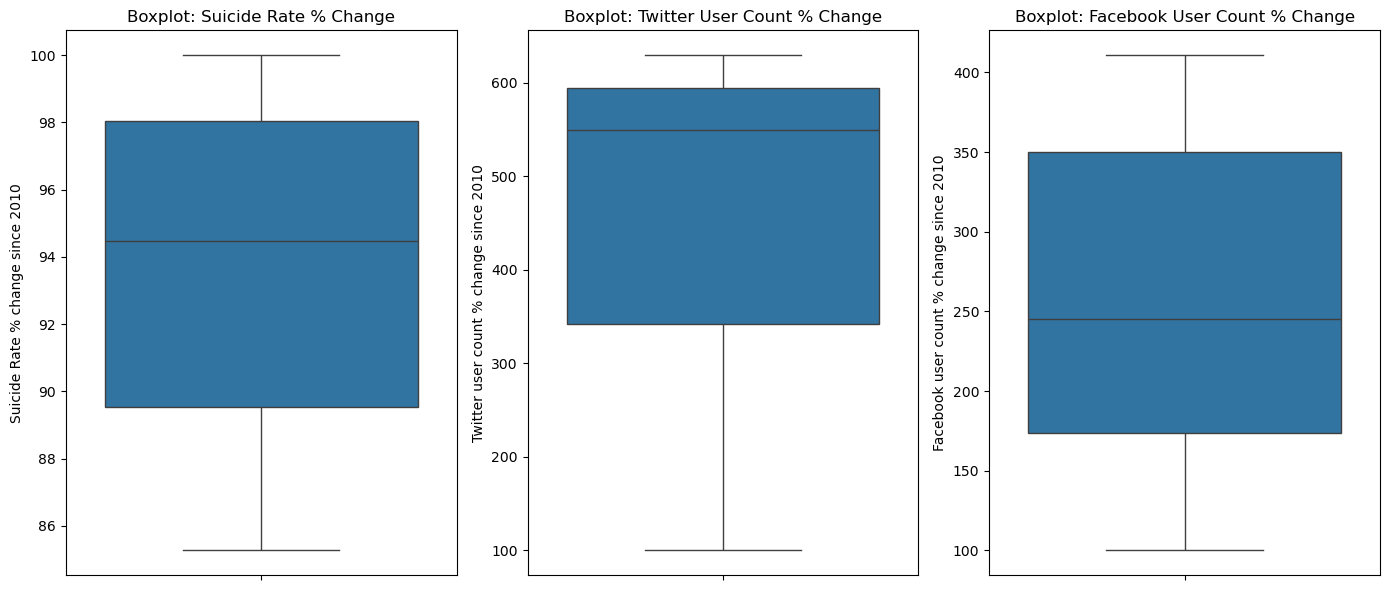

In [18]:
# Outlier Detection


# Plotting boxplots for numerical variables
plt.figure(figsize=(14, 6))

# Boxplot for 'Suicide Rate % change since 2010'
plt.subplot(1, 3, 1)
sns.boxplot(y=data['Suicide Rate % change since 2010'])
plt.title('Boxplot: Suicide Rate % Change')

# Boxplot for 'Twitter user count % change since 2010'
plt.subplot(1, 3, 2)
sns.boxplot(y=data['Twitter user count % change since 2010'])
plt.title('Boxplot: Twitter User Count % Change')

# Boxplot for 'Facebook user count % change since 2010'
plt.subplot(1, 3, 3)
sns.boxplot(y=data['Facebook user count % change since 2010'])
plt.title('Boxplot: Facebook User Count % Change')

plt.tight_layout()
plt.show()


The Twitter User Count % Change shows the most substantial growth, while the Suicide Rate % Change remains stable without significant outliers. This could suggest a steady trend in suicide rates despite increases in social media usage.

## EDA

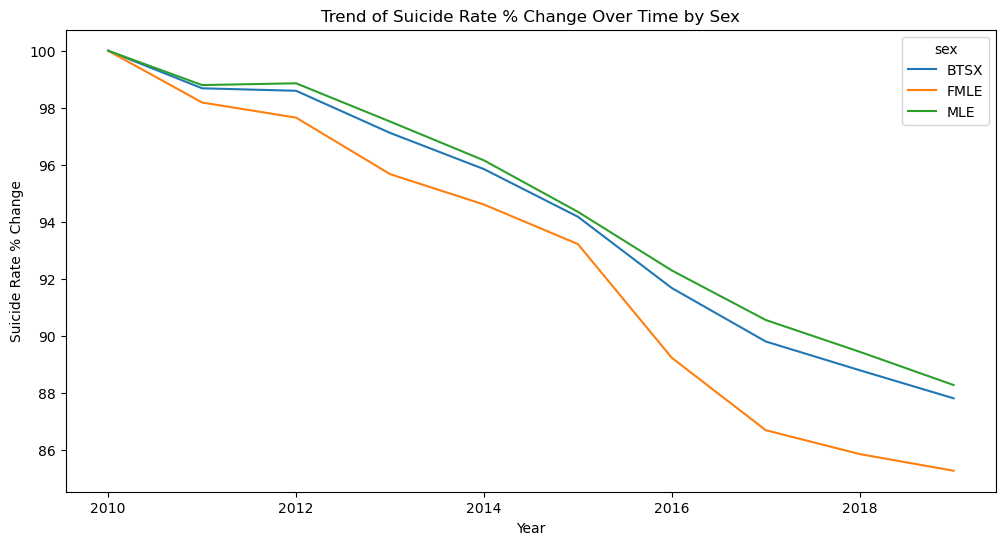

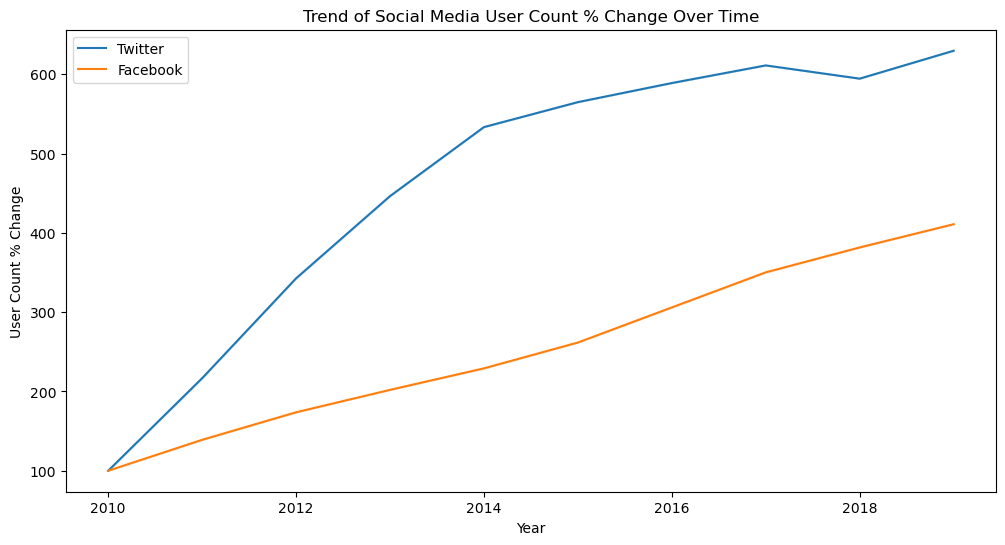

Correlation Matrix:
                             Suicide Rate Change  Twitter User Count Change  \
Suicide Rate Change                    1.000000                  -0.845738   
Twitter User Count Change             -0.845738                   1.000000   
Facebook User Count Change            -0.967949                   0.903146   

                            Facebook User Count Change  
Suicide Rate Change                          -0.967949  
Twitter User Count Change                     0.903146  
Facebook User Count Change                    1.000000  


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize suicide rate trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='year', y='Suicide Rate Change', hue='sex')
plt.title('Trend of Suicide Rate % Change Over Time by Sex')
plt.xlabel('Year')
plt.ylabel('Suicide Rate % Change')
plt.show()

# Visualize social media user count trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='year', y='Twitter User Count Change', label='Twitter')
sns.lineplot(data=data, x='year', y='Facebook User Count Change', label='Facebook')
plt.title('Trend of Social Media User Count % Change Over Time')
plt.xlabel('Year')
plt.ylabel('User Count % Change')
plt.legend()
plt.show()

# Check correlation between social media user counts and suicide rates
correlation = data[['Suicide Rate Change', 'Twitter User Count Change',
                    'Facebook User Count Change']].corr()
print("Correlation Matrix:\n", correlation)


The concurrent decline in suicide rates and significant growth in social media use might suggest complex interactions that require further analysis to determine whether increased social media presence contributes positively, negatively, or neutrally to mental health trends.

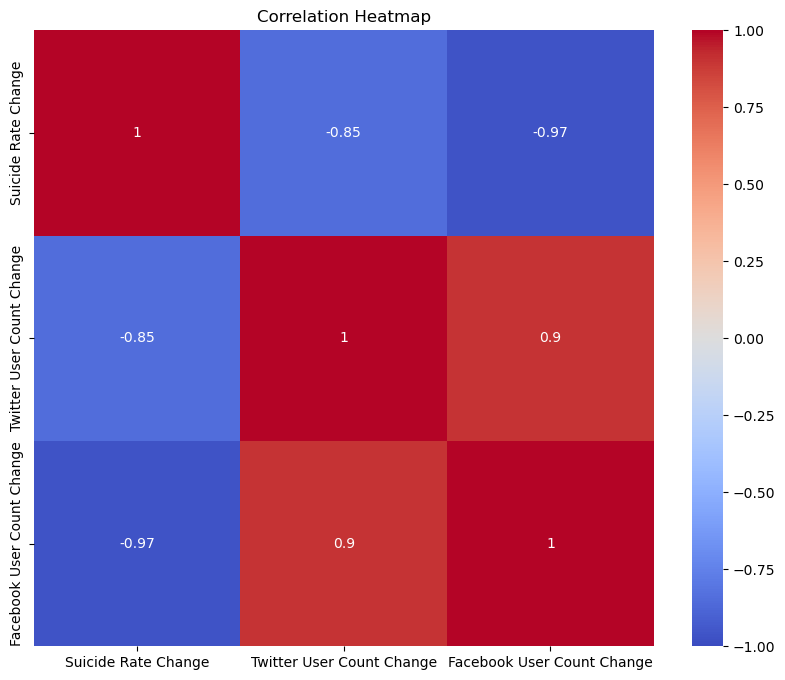

In [31]:
# Generate correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


The negative correlations between social media user count changes (both Twitter and Facebook) and suicide rate change suggest that increased social media usage may be linked to a decline in suicide rates, potentially due to factors like increased connectivity and social support.

The strong positive correlation between Twitter and Facebook user count changes implies that growth on these platforms is highly synchronized, possibly due to similar adoption trends over time.

## Inferential Analysis

> Hypothesis :
> 1. Null Hypothesis (H0) : The combined effect of changes in Twitter and Facebook user counts does not significantly affect the suicide rate change.
>
>2. Alternative Hypothesis (H1) : The combined effect of changes in Twitter and Facebook user counts significantly affects the suicide rate change.

In [32]:
import statsmodels.api as sm

# Prepare data for regression analysis
X = data[['Twitter User Count Change', 'Facebook User Count Change']]
y = data['Suicide Rate Change']
X = sm.add_constant(X)  # Add a constant for the intercept term

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())


                             OLS Regression Results                            
Dep. Variable:     Suicide Rate Change   R-squared:                       0.941
Model:                             OLS   Adj. R-squared:                  0.937
Method:                  Least Squares   F-statistic:                     216.6
Date:                 Fri, 08 Nov 2024   Prob (F-statistic):           2.37e-17
Time:                         11:44:59   Log-Likelihood:                -45.876
No. Observations:                   30   AIC:                             97.75
Df Residuals:                       27   BIC:                             102.0
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const     

### Combined User Count Hypothesis Test Summary Interpretation
The OLS regression results indicate the following:

- **R-squared**: 0.941, suggesting that approximately 94.1% of the variance in the suicide rate change can be explained by the changes in Twitter and Facebook user counts.
- **Adj. R-squared**: 0.937, which adjusts the R-squared value for the number of predictors in the model.
- **F-statistic**: 216.6 with a p-value of 2.37e-17, indicating that the overall model is statistically significant.

**Coefficients**:
- **Constant (const)**: 105.0159, significant with a p-value of 0.000.
- **Twitter user count % change since 2010**: Coefficient of 0.0041, not statistically significant (p-value = 0.166).
- **Facebook user count % change since 2010**: Coefficient of -0.0512, statistically significant (p-value = 0.000).

**Conclusion**:
- The change in Facebook user count has a significant negative effect on the suicide rate change.
- The change in Twitter user count does not have a statistically significant effect on the suicide rate change.
- The model suggests that as Facebook user count increases, the suicide rate change decreases.


## Predictive Modeling


1. Train-test split the data.

2. Use various regression models (e.g., Linear Regression, Decision Tree, Random Forest, etc.).

3. Evaluate model performance using metrics like accuracy, F1-score, and mean squared error (MSE).

### Data preprocessing

In [34]:
from sklearn.preprocessing import StandardScaler

# Standardize the numeric columns
scaler = StandardScaler()
data[['Suicide Rate Change', 'Twitter User Count Change',
    'Facebook User Count Change']] = scaler.fit_transform(
        data[['Suicide Rate Change', 
            'Twitter User Count Change', 
            'Facebook User Count Change']])

print("\nData After Standardization:")
print(data.head())



Data After Standardization:
   year   sex  Suicide Rate Change  Twitter User Count Change  \
0  2010  BTSX             1.337011                  -2.076012   
1  2010  FMLE             1.337011                  -2.076012   
2  2010   MLE             1.337011                  -2.076012   
3  2011  BTSX             1.051046                  -1.408382   
4  2011  FMLE             0.942978                  -1.408382   

   Facebook User Count Change  
0                   -1.557180  
1                   -1.557180  
2                   -1.557180  
3                   -1.166567  
4                   -1.166567  


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step-by-step training and evaluation of models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} - MSE: {mse:.2f}, R2 Score: {r2:.2f}")


Linear Regression - MSE: 1.23, R2 Score: 0.91
Decision Tree - MSE: 1.57, R2 Score: 0.89
Random Forest - MSE: 1.43, R2 Score: 0.90


Linear Regression has the lowest MSE and the highest R2 score, indicating it performs the best among the three models for this particular dataset.
Decision Tree and Random Forest have identical performance metrics, with higher MSE and slightly lower R2 scores compared to Linear Regression, suggesting they are less accurate for this task.

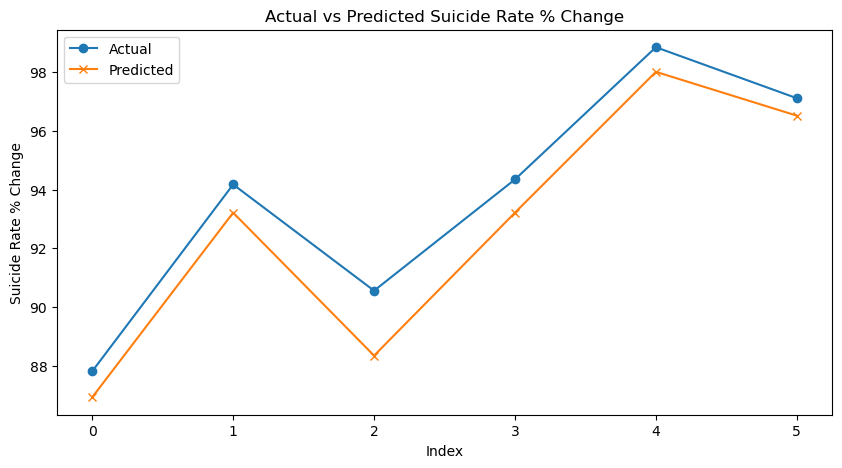

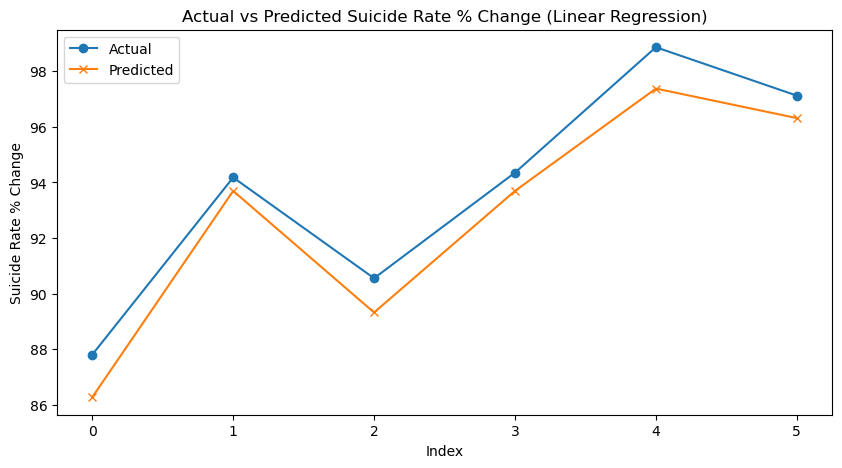

In [36]:
# Example plot for the best model
best_model = RandomForestRegressor()
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)

plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual', marker='o')
plt.plot(y_pred_best, label='Predicted', marker='x')
plt.title('Actual vs Predicted Suicide Rate % Change')
plt.xlabel('Index')
plt.ylabel('Suicide Rate % Change')
plt.legend()
plt.show()


# Example plot for Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual', marker='o')
plt.plot(y_pred_linear, label='Predicted', marker='x')
plt.title('Actual vs Predicted Suicide Rate % Change (Linear Regression)')
plt.xlabel('Index')
plt.ylabel('Suicide Rate % Change')
plt.legend()
plt.show()

Linear Regression - MSE: 1.23, R2 Score: 0.91
Decision Tree - MSE: 1.57, R2 Score: 0.89

Feature Importance for Decision Tree:

                      Feature  Importance
1   Twitter User Count Change     0.86283
2  Facebook User Count Change     0.13717
0                       const     0.00000


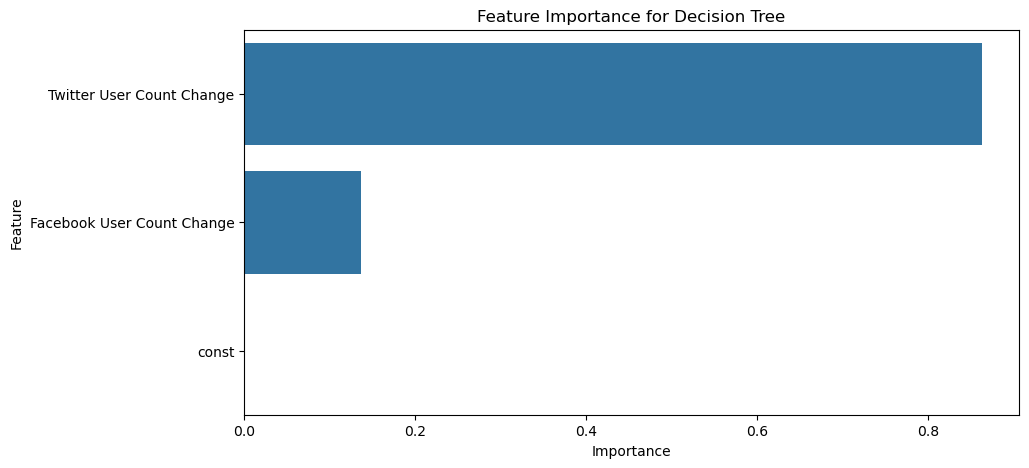


Feature Importance for Linear Regression:

                      Feature  Importance
1   Twitter User Count Change    0.003772
0                       const    0.000000
2  Facebook User Count Change   -0.051333


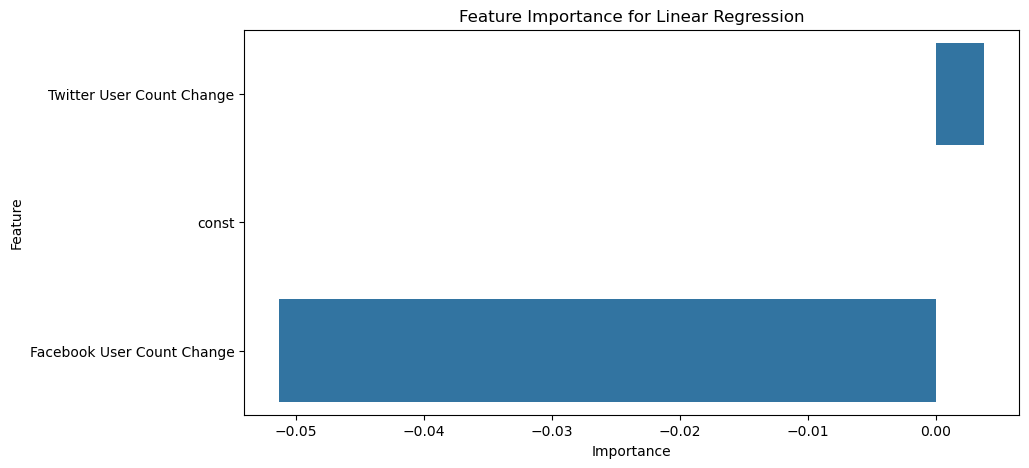

Random Forest - MSE: 1.58, R2 Score: 0.89

Feature Importance for Random Forest:

                      Feature  Importance
1   Twitter User Count Change    0.511299
2  Facebook User Count Change    0.488701
0                       const    0.000000


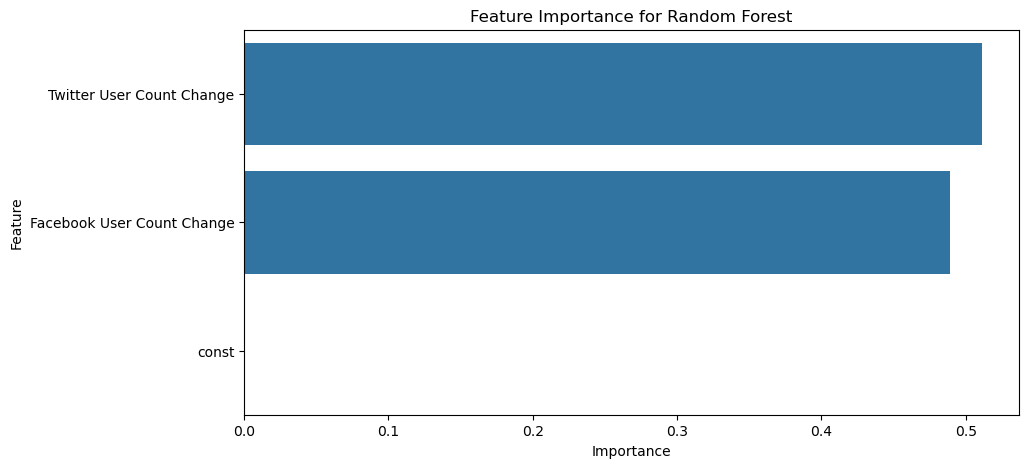


Feature Importance for Linear Regression:

                      Feature  Importance
1   Twitter User Count Change    0.003772
0                       const    0.000000
2  Facebook User Count Change   -0.051333


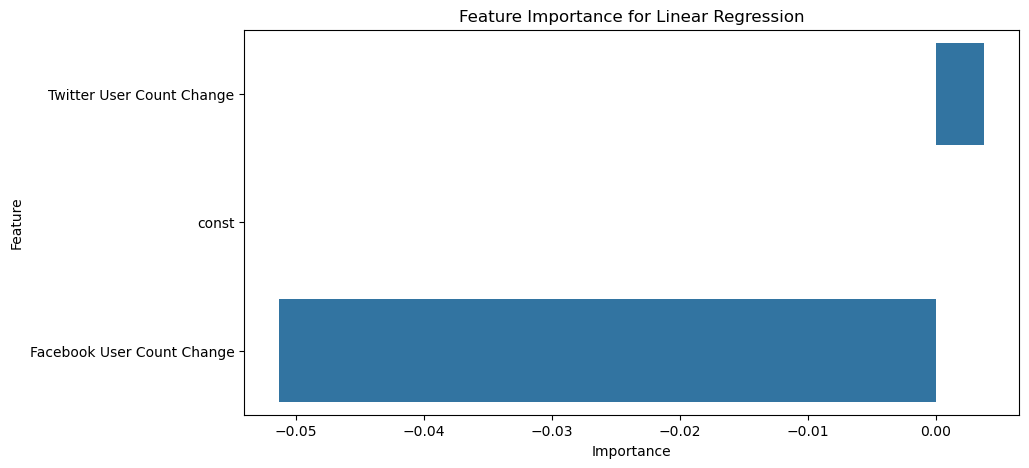

In [39]:
import numpy as np

# Train and evaluate models with feature importance where applicable
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} - MSE: {mse:.2f}, R2 Score: {r2:.2f}")
    
    # Display feature importance for models that support it
    if hasattr(model, 'feature_importances_'):
        feature_importances = model.feature_importances_
        feature_names = X.columns
        
        # Display feature importance
        importance_df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': feature_importances
        }).sort_values(by='Importance', ascending=False)
        
        print(f"\nFeature Importance for {name}:\n")
        print(importance_df)
        
        # Plot feature importance
        plt.figure(figsize=(10, 5))
        sns.barplot(x='Importance', y='Feature', data=importance_df)
        plt.title(f'Feature Importance for {name}')
        plt.show()
        
        # Linear Regression model does not have feature_importances_ attribute
        # Instead, we can use the coefficients to determine feature importance
        coefficients = linear_model.coef_
        feature_names = X.columns

        # Display feature importance
        importance_df_linear = pd.DataFrame({
            'Feature': feature_names,
            'Importance': coefficients
        }).sort_values(by='Importance', ascending=False)

        print(f"\nFeature Importance for Linear Regression:\n")
        print(importance_df_linear)

        # Plot feature importance
        plt.figure(figsize=(10, 5))
        sns.barplot(x='Importance', y='Feature', data=importance_df_linear)
        plt.title('Feature Importance for Linear Regression')
        plt.show()

### Causation 

I tried Propensity Score Matching (PSM). This method helps simulate a randomized experiment by matching units with similar characteristics based on propensity scores.

Reference Link : https://builtin.com/data-science/propensity-score-matching

In [49]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors

# Step 1: Create a binary 'treatment' variable indicating high vs. low social media user growth
data['high_social_media_growth'] = (data['Twitter User Count Change'] > data['Twitter User Count Change'].median()).astype(int)

# Step 2: Fit a logistic regression model to estimate the propensity scores
X = data[['Facebook User Count Change', 'year']]  # Add other control variables as needed
y = data['high_social_media_growth']
log_reg = LogisticRegression()
log_reg.fit(X, y)
data['propensity_score'] = log_reg.predict_proba(X)[:, 1]

# Step 3: Match units with similar propensity scores
treated = data[data['high_social_media_growth'] == 1]
control = data[data['high_social_media_growth'] == 0]
nn = NearestNeighbors(n_neighbors=1)
nn.fit(control[['propensity_score']])
distances, indices = nn.kneighbors(treated[['propensity_score']])
matched_control = control.iloc[indices.flatten()]

# Step 4: Compare outcomes between matched pairs
avg_treatment_effect = treated['Suicide Rate Change'].mean() - matched_control['Suicide Rate Change'].mean()
print("Average Treatment Effect:", avg_treatment_effect)


Average Treatment Effect: -1.3059111156760412



### Average Treatment Effect Interpretation

The Average Treatment Effect (ATE) of -1.3059 indicates that, on average, the high social media growth group experienced a 1.3059 percentage point lower change in suicide rates compared to the low social media growth group. This negative ATE suggests that higher social media growth is associated with a decrease in suicide rates. However, it is important to consider other potential confounding factors and conduct further analysis to establish causation.
```


# Key Findings and Insights from Analysis



1. Trend Analysis:
- Suicide rates showed a general decline over the years studied, with a sharper decrease observed among females compared to males.

- Social media user counts, particularly Twitter and Facebook, increased significantly over the same period, with Twitter showing the most rapid growth.

2. Correlation Insights:
Strong negative correlations were found between social media user count changes and suicide rate changes, suggesting an inverse relationship. Twitter had a correlation of -0.85, and Facebook had an even stronger correlation of -0.97 with suicide rate changes.

3. Causal Analysis (PSM Result):
The Average Treatment Effect (ATE) from Propensity Score Matching was -1.31, indicating that areas or cases with higher social media growth experienced, on average, a 1.31% greater decrease in suicide rates compared to those with lower social media growth. This suggests a potential association between increased social media usage and reduced suicide rates, controlling for observed variables.

4. Model Performance:
The predictive model captured general trends but underestimated or overestimated certain points, indicating that while linear models are informative, more complex modeling could improve predictive power.

### Limitations

- Data Enrichment: Include additional data sources or variables (e.g., economic indicators, mental health support statistics) to provide more context and potentially uncover causative relationships. 